# Data Cleaning Project 1

## Part II - Examine the difference of pricing between fresh and processed fruit by year

The data for this project comes from a The United States Department of Agriculture (USDA)  [USDA ERS- Fruit and Vegetable Prices](https://www.ers.usda.gov/data-products/fruit-and-tree-nut-data/yearbook-tables/#Noncitrus Fruit) (Economics Research Service). The Fruit and Tree Nuts Yearbook tables contain over 20 years of time-series data for U.S. bearing acreage, production, prices, and more. We'll use the grower prices from these tables for part II. 

The two main variables:

* **Fresh** : Grower price on fresh fruits 
* **Processed** : Grower price on processed fruits

For part II of the project, we will: 

1. Read the documentation and familiarize yourself with the dataset. 
2. Combine all of the data files into one large dataset with meaningful values for 'Fresh' and 'Processed' variables. 
3. Change all prices into the same unit per comparison
4. Plot the trend of grower price on fresh/processed fruit by year for all fruits
5. Plot the average grower price by category on fresh/processed fruit
6. Plot a 3 by 1 plots with 3 subplots for each category, with individual fresh fruit prices and the average of each category. Make the same plot for processed fruit prices as well. 
 


### Data Cleaning

In [281]:
# load necessary packages 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import glob

# change display format
#pd.options.display.float_format = '{:.3f}'.format

listOfFiles = glob.glob("data/Part II & III/*.xlsx")
listOfFiles

['data/Part II & III\\FruitYearbookBerries_DTables.xlsx',
 'data/Part II & III\\FruitYearbookCitrusFruit_CTables.xlsx',
 'data/Part II & III\\FruitYearbookMelons_ETables.xlsx',
 'data/Part II & III\\FruitYearbookNoncitrusFruit_BTables.xlsx']

The data contains 4 files with differet number of worksheets, so the issue that we need to deal with for cleaning the data is how to select the useful information from these files. 

In [2]:
# define helper functions

def capitalize(line):
    return ' '.join(s[0].upper() + s[1:] for s in line.split(' '))

def findFruitName(x, sheetName):
    if sheetName == 'tab-d3a':
        return 'Boysenberries' 
    elif sheetName == 'tab-d3b':
        return 'Loganberries'
    else: 
        firstIndex = x.index('--')
        secondIndex = x.index(':')
        result = x[firstIndex+2:secondIndex]
        result = result.replace('All ', '')
        result = result.replace('U.S. ', '')
        result = result.capitalize()
        return result

def findYear(x):
    try: 
        firstIndex = x.index('/') 
        return x[:firstIndex]
    except: 
        return x

#### Create a dictionary to deal with different worksheets in each file

In [282]:
# create a dictionary to store the columns to pull for each worksheet in the files
listOfFiles = glob.glob("data/Part II & III/*.xlsx")
listOfFiles

berriesList = list(range(1,10)) 
citrusList = [4, 15, 22]
melonList = [11,12,13] ###
noncitrusList1 = [4, 8, 11, 14, 23, 24, 27, 33] ###
noncitrusList2 = [9, 10, 18, 19] ###


all_sheets = {}
for f in listOfFiles: 
    xls_file = pd.ExcelFile(f)
    sheet_names = xls_file.sheet_names
    
    if f == listOfFiles[0]:
        for i in range(len(sheet_names)): 
            if i in berriesList: 
                all_sheets[sheet_names[i]] = [0,8,9,10]
            elif i == 11:
                all_sheets[sheet_names[i]] = [0,11,12,13]
            elif i == 12: 
                all_sheets[sheet_names[i]] = [0,3]
                
    elif f == listOfFiles[1]: 
        for i in range(len(sheet_names)): 
            if i in citrusList: 
                df= xls_file.parse(sheet_names[i],header = 0)  
                length = len(df.columns)          
                all_sheets[sheet_names[i]] = [0,length-3,length-2,length-1]
                
    elif f == listOfFiles[2]:
        for i in range(len(sheet_names)): 
            if i in melonList: 
                all_sheets[sheet_names[i]] = [0,15]
                
    else: 
        for i in range(len(sheet_names)): 
            if i in noncitrusList1: 
                all_sheets[sheet_names[i]] =[0, 7, 8, 9]
            elif i == 20: 
                df= xls_file.parse(sheet_names[i],header = 0)  
                length = len(df.columns)          
                all_sheets[sheet_names[i]] = [0,length-3,length-2,length-1]                
            elif i == 30: 
                all_sheets[sheet_names[i]] = [0, 9, 8]
            elif i in noncitrusList2:   
                df= xls_file.parse(sheet_names[i],header = 0)  
                length = len(df.columns)      
                all_sheets[sheet_names[i]] = [0, length-2]
print(all_sheets)

{'tab-d1': [0, 8, 9, 10], 'tab-d2a': [0, 8, 9, 10], 'tab-d2b': [0, 8, 9, 10], 'tab-d2c': [0, 8, 9, 10], 'tab-d2d': [0, 8, 9, 10], 'tab-d3a': [0, 8, 9, 10], 'tab-d3b': [0, 8, 9, 10], 'tab-d4': [0, 8, 9, 10], 'tab-d5': [0, 8, 9, 10], 'tab-d7': [0, 11, 12, 13], 'tab-d8': [0, 3], 'tabc4': [0, 17, 18, 19], 'tabc15': [0, 9, 10, 11], 'tabc22': [0, 17, 18, 19], 'Table E-11': [0, 15], 'Table E-12': [0, 15], 'Table E-13': [0, 15], 'tabb-4': [0, 7, 8, 9], 'tabb-8': [0, 7, 8, 9], 'tabb-9': [0, 10], 'tabb10': [0, 5], 'tabb11': [0, 7, 8, 9], 'tabb14': [0, 7, 8, 9], 'tabb18': [0, 9], 'tabb19': [0, 3], 'tabb20': [0, 5, 6, 7], 'tabb23': [0, 7, 8, 9], 'tabb24': [0, 7, 8, 9], 'tabb27': [0, 7, 8, 9], 'tabb30': [0, 9, 8], 'tabb33': [0, 7, 8, 9]}


 In order to compare the trend of Fresh, Pressed, and overall prices, we have to gather data with all three values. Therefore, we will not include the fruits with overall price only, such as cantaloupe, honeydew, watermelon, strawbery, avocado, banana, guava, and kiwi. We have also excluded lemons here because its processed prices are either negative or missing. 

In [32]:
# only keep data with complete Fresh, Processed, and ALl data

combined_data = pd.DataFrame()
for f in listOfFiles: 
    fruitType = None
    xls_file = pd.ExcelFile(f)
    sheet_names = xls_file.sheet_names
    
    for i in (sheet_names): 
        new = pd.DataFrame()
        if i == 'Content':
            df= xls_file.parse(i,header = 0)
            fruitType = df.columns.values[0]
            
        elif i in all_sheets: 
            df= xls_file.parse(i,header = 0)  
            new = df[df.columns[all_sheets[i]]]
            new = new.dropna()
            new= new.reset_index()

            ## format of Melon files are different, 'tabc15' is lemons
            if i in ('tabc15', 'Table E-11', 'Table E-12', 'Table E-13', 'tab-d8', 'tabb-9', 'tabb10', 'tabb18', 'tabb19'): 
                continue
              
            elif i== 'tabb30': 
                new.columns = ['index', 'Year', 'Fresh', 'Processed']
                tmp = new[['index', 'Fresh', 'Processed']]
                new = new[tmp.applymap(np.isreal).all(1)]
                # impute data by using average of Fresh and Processed
                new['All'] = new[['Processed', 'Fresh']].mean(axis=1)
            
            else: 
                new.columns = ['index', 'Year', 'Fresh', 'Processed', 'All']
                tmp = new[['index', 'Fresh', 'Processed', 'All']]
                new = new[tmp.applymap(np.isreal).all(1)]

            # set variables
            new['Category'] = fruitType
            new['Fruit'] = findFruitName(df.columns[0], i)
            new.Year = new.Year.apply(findYear)
            
            # rearrange columns
            new = new[['Category', 'Fruit', 'Year', 'Fresh', 'Processed', 'All']]        
            
        else: 
            continue
            
        combined_data = combined_data.append(new, ignore_index=True) 

# rename some variables
combined_data.Fruit = combined_data.Fruit.replace('U.S. ', '', regex= True)
combined_data.Fruit = combined_data.Fruit.replace('All ', '', regex= True)
combined_data.Fruit = combined_data.Fruit.replace('Cherries, sweet', 'Cherries', regex= True)
combined_data.Category = combined_data.Category.replace(' Fruit', '', regex= True)

#change variable type
combined_data.ix[:, 'Year'] = combined_data.ix[:, 'Year'].astype(int)
combined_data.ix[:, 'Fresh'] = combined_data.ix[:, 'Fresh'].astype(float)
combined_data.ix[:, 'Processed'] = combined_data.ix[:, 'Processed'].astype(float)
combined_data.ix[:, 'All'] = combined_data.ix[:, 'All'].astype(float)

print(combined_data.head())
print()
print('Number of fruits in this dataset: ', len(combined_data.Fruit.unique()))
print('The combined data have ', combined_data.shape[0], ' rows')

  Category         Fruit  Year  Fresh  Processed   All
0  Berries  Blackberries  1980   41.2       20.1  20.4
1  Berries  Blackberries  1981   30.5       17.2  17.5
2  Berries  Blackberries  1982   44.1       23.2  24.2
3  Berries  Blackberries  1983   54.2       29.1  29.3
4  Berries  Blackberries  1984   49.8       49.8  49.8

Number of fruits in this dataset:  19
The combined data have  903  rows


#### Aggregate price data across different states

Now we have a dataset with complete data for all three variables (Fresh, processed, and overall price). However, most of the data in the berries category contain data from multiple states. For example, blueberries data contains data from 14 states. 

If we assume these states are representative for U.S., then we can take an average of these data and get an representative data for the U.S. Similarly for other berries, we have data from different number of states. We'll get an average for each fruit in the berries category. 

In [33]:
BerriesDf = pd.DataFrame()
fruitList = combined_data.Fruit[combined_data.Category == 'Berries'].unique()

combined_data['Fresh'] = combined_data['Fresh'].astype(float)
combined_data['Processed'] = combined_data['Processed'].astype(float)
combined_data['All'] =combined_data['All'].astype(float)

# combine diff states data for "berries" 
for i in fruitList:  
    tmp = combined_data[combined_data.Fruit == i]
    avgData = tmp.groupby(['Category', 'Fruit', 'Year'], sort = True)['Fresh', 'Processed', 'All'].mean()
    avgData = avgData.reset_index()
    BerriesDf = BerriesDf.append(avgData, ignore_index=True)

# change decimal places
BerriesDf.Fresh = round(BerriesDf.Fresh,2) 
BerriesDf.Processed = round(BerriesDf.Processed,2) 
BerriesDf.All = round(BerriesDf.All,2) 

# edit fruit names
BerriesDf.Category = BerriesDf.Category.replace(' Fruit', '', regex= True)
print(BerriesDf.head())
print()
print('The new berries data have ', BerriesDf.shape[0], ' rows')

  Category         Fruit  Year  Fresh  Processed   All
0  Berries  Blackberries  1980   41.2       20.1  20.4
1  Berries  Blackberries  1981   30.5       17.2  17.5
2  Berries  Blackberries  1982   44.1       23.2  24.2
3  Berries  Blackberries  1983   54.2       29.1  29.3
4  Berries  Blackberries  1984   49.8       49.8  49.8

The new berries data have  222  rows


Now we've calculated the averages for all berries categories, we will now combine it with the original data. 

In [34]:
combined_data = combined_data[combined_data.Category != 'Berries']
combined_data = combined_data.append(BerriesDf)

print(combined_data.shape)

(617, 6)


#### Convert all prices to the same unit (dollar/pound)

Since all fruit prices have different units, we have to change them to the same unit. We will use dollar/pound for the price unit. 

In [35]:
# create a dictionary for grouping fruits with the same unit
dicFruitUnit = {}

# cents/lb
for i in combined_data.Fruit.unique():
    # cents/lb for all three
    if i in ('Blackberries', 'Blueberries', 'Boysenberries', 'Loganberries', 'Black raspberries', 
             'Red raspberries', 'Bananas', 'Guavas', 'Papayas'):
        dicFruitUnit[i] = 1
    # $/ton for all 3
    elif i in ('Avocados', 'Apricots', 'Cherries', 'Grapes', 'Kiwi', 'Nectarines', 'Pears', 
               'Pineapples', 'Prunes and plums'):
        dicFruitUnit[i] = 2
    # $/cwt, or $/112 lb for All
    elif i in ('Strawberries', 'Cantaloupes', 'Honeydew', 'Watermelons'):
        dicFruitUnit[i] = 3
    # $/100 lb for fresh, processed, All
    elif i == 'Cranberries':
        dicFruitUnit[i] = 4
    # cents/lb, $/ton, cents/lb for Fresh, processed, all, respectively
    elif i in ('Apples', 'Peaches'):
        dicFruitUnit[i] = 5
    # $/76 lbs before 2010, $/80 lbs on and after 2010
    elif i in ('Grapefruit', 'Lemons', 'Oranges'): 
        dicFruitUnit[i] = 6
        
print(dicFruitUnit)

{'Grapefruit': 6, 'Oranges': 6, 'Apples': 5, 'Apricots': 2, 'Cherries': 2, 'Grapes': 2, 'Nectarines': 2, 'Papayas': 1, 'Peaches': 5, 'Pears': 2, 'Pineapples': 2, 'Prunes and plums': 2, 'Blackberries': 1, 'Blueberries': 1, 'Boysenberries': 1, 'Loganberries': 1, 'Black raspberries': 1, 'Red raspberries': 1, 'Cranberries': 4}


We'll use the dictionary to change units differently. 

In [36]:
def changeUnit(data, dic):
    for i in data.Fruit.unique():
        if dic[i] == 1: 
            data.ix[(data.Fruit == i), 'Fresh'] /= 100
            data.ix[(data.Fruit == i), 'Processed'] /= 100
            data.ix[(data.Fruit == i), 'All'] /= 100
        elif dic[i] == 2: 
            data.ix[(data.Fruit == i), 'Fresh'] /= 2000
            data.ix[(data.Fruit == i), 'Processed']  /= 2000
            data.ix[(data.Fruit == i), 'All']  /= 2000
        elif dic[i] == 3: 
            data.ix[(data.Fruit == i), 'All']  /= 112  
        elif dic[i] == 4: 
            data.ix[(data.Fruit == i), 'Fresh'] /= 100
            data.ix[(data.Fruit == i), 'Processed'] /= 100
            data.ix[(data.Fruit == i), 'All'] /= 100      
        elif dic[i] == 5: 
            data.ix[(data.Fruit == i), 'Fresh'] /= 100
            data.ix[(data.Fruit == i), 'Processed'] /= 2000
            data.ix[(data.Fruit == i), 'All'] /= 100
        elif dic[i] == 6: 
            # $/76 lb before 2010
            data.ix[(data.Fruit == i) & (data.Year < 2010), 'Fresh']  /= 76
            data.ix[(data.Fruit == i) & (data.Year < 2010), 'Processed']  /= 76
            data.ix[(data.Fruit == i) & (data.Year < 2010), 'All']  /= 76
            
            # $/80 lb since 2010
            data.ix[(data.Fruit == i) & (data.Year >= 2010), 'Fresh']  /= 80
            data.ix[(data.Fruit == i) & (data.Year >= 2010), 'Processed']  /= 80
            data.ix[(data.Fruit == i) & (data.Year >= 2010), 'All']  /= 80
    return data

final_data = changeUnit(combined_data, dicFruitUnit)
print(final_data.head())

    Category       Fruit  Year     Fresh  Processed       All
508   Citrus  Grapefruit  1980  0.067763   0.031053  0.046053
509   Citrus  Grapefruit  1981  0.051842   0.008684  0.026184
510   Citrus  Grapefruit  1982  0.041842   0.002895  0.023553
511   Citrus  Grapefruit  1983  0.054474   0.018026  0.035263
512   Citrus  Grapefruit  1984  0.082500   0.031316  0.051974


### Data Exploration/ Visualization

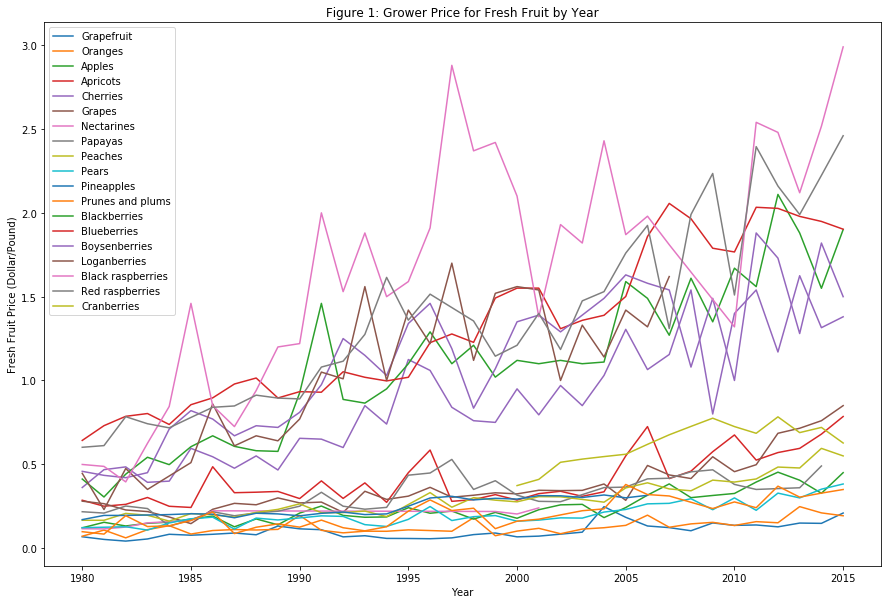

In [256]:
# sort data before plotting
final_data.sort_values(['Category', 'Fruit', 'Year'], ascending=[True, True, True])

plt.figure(figsize=(15,10),facecolor='w') 
ax = fig.add_subplot(111)
series = []
for temp in (final_data.Fruit.unique()):
    dat = final_data[final_data.Fruit==temp]
    year =  dat.Year
    k = plt.plot(year, dat.Fresh, label = dat.Fruit.values[0])
    series.append(k)

plt.xlabel("Year")
plt.ylabel("Fresh Fruit Price (Dollar/Pound)")
plt.legend()
plt.title('Figure 1: Grower Price for Fresh Fruit by Year')
plt.show()


In [58]:
# final berries with higher price and greater fluctuation 
final_data[final_data.Fresh > 1].Fruit.unique()

array(['Cherries', 'Blackberries', 'Blueberries', 'Boysenberries',
       'Loganberries', 'Black raspberries', 'Red raspberries'], dtype=object)

We can see some fruits have huge fluctuation in grower price for fresh fruit, and the most extreme one is black raspberries. The 7 fruits with a somewhat positive trend of price by year with a greater fluctuation are: cherries, blackberries, blueberries, boysenberries, loganberries, black raspberries, and red raspberries. All of them happen to be in the berries category. Unlike berries, the other fruits exhibit a more stable trend. Surprisingly, cranberries exhibit a stable trend as well when compared to other berries. 

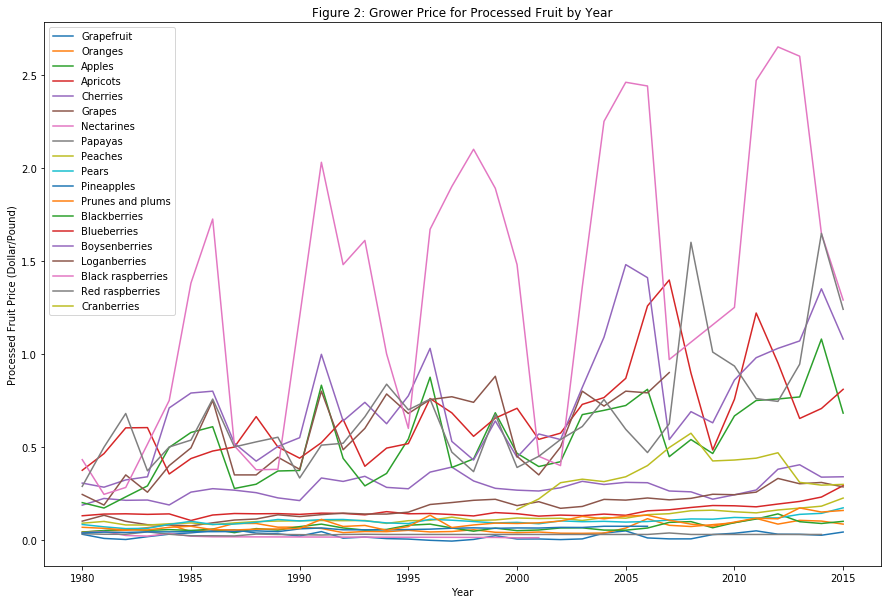

In [257]:
# plot processed fruit vs year
plt.figure(figsize=(15,10),facecolor='w') 
ax = fig.add_subplot(111)
series = []
for temp in (final_data.Fruit.unique()):
    dat = final_data[final_data.Fruit==temp]
    year =  dat.Year
    k = plt.plot(year, dat.Processed, label = dat.Fruit.values[0])
    series.append(k)

plt.xlabel("Year")
plt.ylabel("Processed Fruit Price (Dollar/Pound)")
plt.legend()
plt.title('Figure 2: Grower Price for Processed Fruit by Year')
plt.show()


In [64]:
# final berries with higher price and greater fluctuation 
final_data[final_data.Processed > 0.5].Fruit.unique()

array(['Blackberries', 'Blueberries', 'Boysenberries', 'Loganberries',
       'Black raspberries', 'Red raspberries', 'Cranberries'], dtype=object)

The overall trend for this plot is positive as well, but the slope is much smaller than that of the fresh fruit. We can see the berries still exhibit a higher fluctuation, and the price for the other fruits are more stable. Interestingly, black raspberries here exhibit a somewhat seasonal trend with a period of 5 years approximately. 

Note: we will not examine the plot for the grower price for all fruits as it's a mixture of fresh and processed fruit price. 

#### Compare average prices for each category. 
Note: There's no melon category since there's no fresh or processed price for melons. 

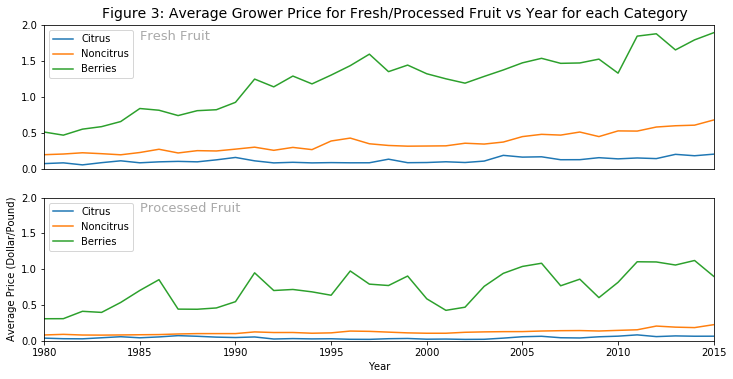

In [274]:
# get dataset of averages by category
avgByCategory = final_data.groupby(['Category', 'Year'])['Fresh', 'Processed', 'All'].mean()
avgByCategory= avgByCategory.reset_index()
avgByCategory

# plot processed fruit vs year
fig, ((ax1), (ax2)) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10,5))
for temp in (final_data.Category.unique()):
    dat = avgByCategory[avgByCategory.Category==temp]
    year =  dat.Year
    ax1.plot(year, dat.Fresh, label = dat.Category.values[0])
    ax1.tick_params(bottom = 'off')
    
for temp in (final_data.Category.unique()):
    dat = avgByCategory[avgByCategory.Category==temp]
    year =  dat.Year
    ax2.plot(year, dat.Processed, label = dat.Category.values[0])
    
plt.xlabel("Year")
plt.ylabel("Average Price (Dollar/Pound)")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.text(1985, 1.8, 'Fresh Fruit', fontsize = 13, color = 'darkgray')
ax2.text(1985, 1.8, 'Processed Fruit', fontsize = 13, color = 'darkgray')
ax1.text(1983, 2.1, 'Figure 3: Average Grower Price for Fresh/Processed Fruit vs Year for each Category', fontsize = 14)
plt.tight_layout(pad=0.5, h_pad=1.5)
ax1.axis([1980, 2015, 0, 2])
ax2.axis([1980, 2015, 0, 2])
plt.show()


Based on the two plots above, we can see that the fluctuation for fresh fruit is much greater than that of processed fruit. In fact, noncitrus and citrus fruit's average prices are almost the same in these 35 years. Unlike processed fruit, fresh fruit exhibit a somewhat positive trend of average price by year, with berries having the highest slope. 

#### Make a figure with individual and average fresh fruit prices for each category

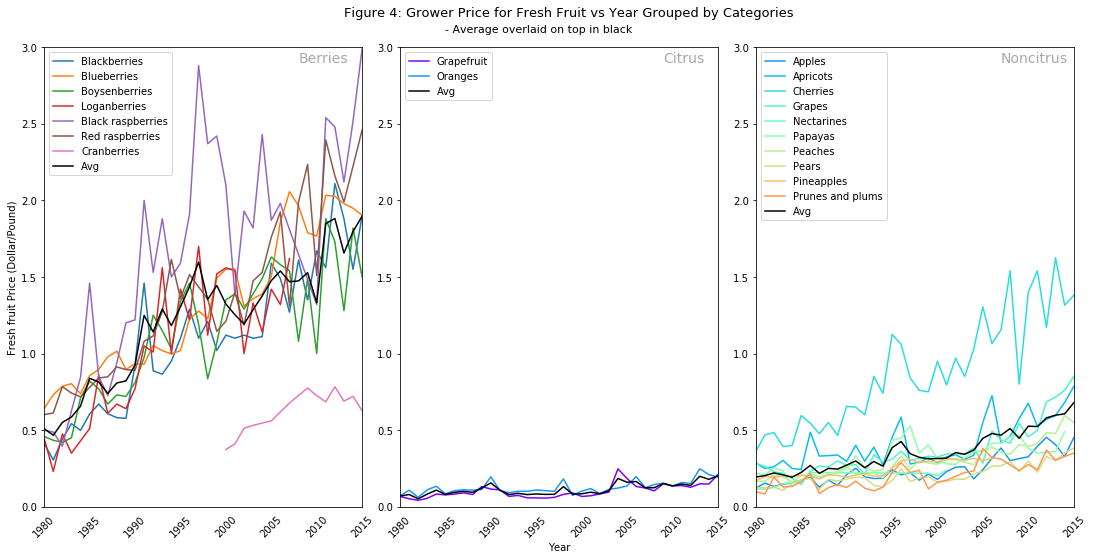

In [279]:
# Plot fresh price grouped by categories with average overlaid on top
# get dataset of averages by category
avgByCategory = final_data.groupby(['Category', 'Year'])['Fresh', 'Processed', 'All'].mean()
avgByCategory= avgByCategory.reset_index()
avgByCategory

# plot processed fruit vs year
fig, ((ax1), (ax2), (ax3)) = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,7))
#fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)

dat = final_data[final_data.Category=='Berries']
for f in dat['Fruit'].unique(): 
    dat2 = dat[dat.Fruit == f]
    year = dat2.Year
    ax1.plot(year, dat2.Fresh, label = f)
    ax1.tick_params(bottom = 'off')
k = avgByCategory[avgByCategory.Category == 'Berries']
ax1.plot(k.Year, k.Fresh, label = 'Avg', color = 'black')
    
dat = final_data[final_data.Category=='Citrus']
colors = cm.rainbow(np.linspace(0, 0.2, len(dat['Fruit'].unique())))
for f, c in zip(dat['Fruit'].unique(), colors): 
    dat2 = dat[dat.Fruit == f]
    year = dat2.Year    
    ax2.plot(year, dat2.Fresh, label = f, color = c)
    ax2.tick_params(bottom = 'off')
k = avgByCategory[avgByCategory.Category == 'Citrus']
ax2.plot(k.Year, k.Fresh, label = 'Avg', color = 'black')
    
dat = final_data[final_data.Category=='Noncitrus']
colors = cm.rainbow(np.linspace(0.2, 0.8, len(dat['Fruit'].unique())))
for f, c in zip(dat['Fruit'].unique(), colors): 
    dat2 = dat[dat.Fruit == f]
    year = dat2.Year
    ax3.plot(year, dat2.Fresh, label = f, color = c)
    ax3.tick_params(bottom = 'off')
k = avgByCategory[avgByCategory.Category == 'Noncitrus']
ax3.plot(k.Year, k.Fresh, label = 'Avg', color = 'black')

ax1.set_ylabel("Fresh fruit Price (Dollar/Pound)")
ax2.set_xlabel("Year")
#plt.ylabel("Fruit Price (Dollar/Pound)")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

# create title
ax1.text(2013, 3.2, 'Figure 4: Grower Price for Fresh Fruit vs Year Grouped by Categories', fontsize = 13)
ax2.text(1985, 3.1, '- Average overlaid on top in black', fontsize = 11)

plt.tight_layout(pad=0.5, h_pad=1.5)

# set axis range
ax1.axis([1980, 2015, 0, 3])
ax2.axis([1980, 2015, 0, 3])
ax3.axis([1980, 2015, 0, 3])

# rotate x labels by 45 degree
for i in [ax1, ax2, ax3]: 
    for tick in i.get_xticklabels():
        tick.set_rotation(45)
        
# label the categories
ax1.text(2008, 2.9, 'Berries', size= 14, color = 'darkgray')
ax2.text(2009, 2.9, 'Citrus', size= 14, color = 'darkgray')
ax3.text(2007, 2.9, 'Noncitrus', size= 14, color = 'darkgray')

plt.show()


This plot is a summary of the fresh fruit prices above. We can see clearly that the berry prices fluctuate greatly, the noncitrus fruit prices fluctuate somewhat, and nearly no fluctuation for citrus fruits. However, keep in mind that there are only 2 citrus fruit in the dataset. This makes sense since berries are likely to be the most sensitive fruits that require the most care, and it reflected on the grower price. On the other hand, citrus fruits have a thick outer layer that protect the meat of the fruit, so it's more durable and requires less care. These are just assumptions, but overall I think the result makes sense. 

#### Create the same plot on processed fruit prices. 

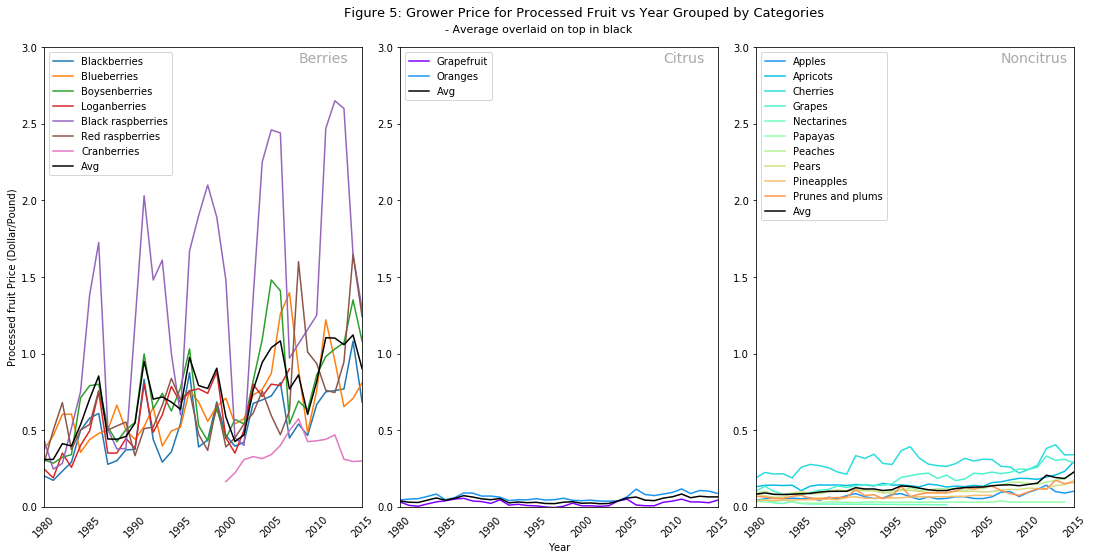

In [280]:
# Plot processed price grouped by categories with average overlaid on top

# plot processed fruit vs year
fig, ((ax1), (ax2), (ax3)) = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(15,7))
#fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=None)

dat = final_data[final_data.Category=='Berries']
for f in dat['Fruit'].unique(): 
    dat2 = dat[dat.Fruit == f]
    year = dat2.Year
    ax1.plot(year, dat2.Processed, label = f)
    ax1.tick_params(bottom = 'off')
k = avgByCategory[avgByCategory.Category == 'Berries']
ax1.plot(k.Year, k.Processed, label = 'Avg', color = 'black')
    
dat = final_data[final_data.Category=='Citrus']
colors = cm.rainbow(np.linspace(0, 0.2, len(dat['Fruit'].unique())))
for f, c in zip(dat['Fruit'].unique(), colors): 
    dat2 = dat[dat.Fruit == f]
    year = dat2.Year    
    ax2.plot(year, dat2.Processed, label = f, color = c)
    ax2.tick_params(bottom = 'off')
k = avgByCategory[avgByCategory.Category == 'Citrus']
ax2.plot(k.Year, k.Processed, label = 'Avg', color = 'black')
    
dat = final_data[final_data.Category=='Noncitrus']
colors = cm.rainbow(np.linspace(0.2, 0.8, len(dat['Fruit'].unique())))
for f, c in zip(dat['Fruit'].unique(), colors): 
    dat2 = dat[dat.Fruit == f]
    year = dat2.Year
    ax3.plot(year, dat2.Processed, label = f, color = c)
    ax3.tick_params(bottom = 'off')
k = avgByCategory[avgByCategory.Category == 'Noncitrus']
ax3.plot(k.Year, k.Processed, label = 'Avg', color = 'black')

    
ax1.set_ylabel("Processed fruit Price (Dollar/Pound)")
ax2.set_xlabel("Year")
#plt.ylabel("Fruit Price (Dollar/Pound)")
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

# create title
ax1.text(2013, 3.2, 'Figure 5: Grower Price for Processed Fruit vs Year Grouped by Categories', fontsize = 13)
ax2.text(1985, 3.1, '- Average overlaid on top in black', fontsize = 11)

plt.tight_layout(pad=0.5, h_pad=1.5)

# set axis range
ax1.axis([1980, 2015, 0, 3])
ax2.axis([1980, 2015, 0, 3])
ax3.axis([1980, 2015, 0, 3])

# rotate x labels by 45 degree
for i in [ax1, ax2, ax3]: 
    for tick in i.get_xticklabels():
        tick.set_rotation(45)

# label the fruit categories
ax1.text(2008, 2.9, 'Berries', size= 14, color = 'darkgray')
ax2.text(2009, 2.9, 'Citrus', size= 14, color = 'darkgray')
ax3.text(2007, 2.9, 'Noncitrus', size= 14, color = 'darkgray')

plt.show()

The plot for processed fruit price is similar to that of fresh fruit. The seasonality of the black raspberries is once again apparent, but the slope of the averages is smaller than that of the fresh fruit. As for noncitrus fruit, the slope is much smaller than that of fresh fruit as well. The citrus fruit trend is again stable, but more flat. The lines in the plot above is similar to the lines in the previous plot, but pushed downward (except black raspberries' seasonality). 

### Conclusion

Note: Fresh fruit price and Processed fruit price below are the grower price for fresh and processed fruit, respectively. 

1. Black raspberries exhibit the greatest fluctuation among all fruits in the dataset (Figure 1 and 2). 
2. Processed prices for black raspberies exhibit a seasonal trend with a period of approximately 5 years (Figure 2).  
3. Fresh fruit price increased more than processed fruit price between 1980 to 2015 (Figure 3). 
4. For both fresh and processed fruit prices, berries exhibit a much greater fluctuation and steeper slope than citrus and noncitrus fruits (Figure 3). 
5. In terms of average prices, berries > noncitrus > citrus fruits for both fresh and processed fruits (Figure 3). 
6. In terms of individual prices, berries > noncitrus > citrus fruits roughly for both fresh and processed fruits (Figure 4 and 5). 
7. Processed fruit prices are similar to that of fresh fruit prices, but with a smaller slope (Figure 4 and 5). 

Overall, the grower price for both fresh and processed fruit tend to be negatively associated with how hard the fruit is. For example, the fruit with a hard shell like melons have a low grower price. On the other hand, the fruit with a soft shell (citrus) or no shell (berries) have a high grower price.